<a href="https://colab.research.google.com/github/soyoonjeong/DeepLearning-study/blob/main/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터셋 로드**

In [1]:
from keras.datasets import imdb

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(25000,)

In [3]:
test_data.shape

(25000,)

# **데이터 준비**

숫자 리스트를 텐서로 변경 => 원-핫 인코딩

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32') # 스칼라값을 넘파이 배열로 변경
y_test = np.asarray(test_labels).astype('float32')

# **신경망 모델 만들기**

- 16개의 은닉 유닛을 가진 2개의 은닉 층
- 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, input_shape=(10000,), activation="relu"))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid")) # 값을 0과 1 사이로 압축


# **모델 컴파일하기**

In [7]:
model.compile(optimizer="rmsprop",
              loss='binary_crossentropy',
              metrics=['acc'])

# **훈련 검증하기**

훈련 데이터에서 10000개의 샘플 떼내어 검증 세트 만들기

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# **모델 훈련하기**

- 512개의 샘플씩 미니 배치를 만들어 모든 샘플에 대해 20번의 에포크 동안 훈련 
- 동시에 따로 떼어 높은 1만 개의 샘플에서 손실과 정확도를 측정함

In [9]:
history = model.fit(partial_x_train, partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5435 - acc: 0.7854 - val_loss: 0.4249 - val_acc: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 29ms/step - loss: 0.3428 - acc: 0.8957 - val_loss: 0.3248 - val_acc: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2528 - acc: 0.9205 - val_loss: 0.2866 - val_acc: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1988 - acc: 0.9359 - val_loss: 0.2824 - val_acc: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1617 - acc: 0.9481 - val_loss: 0.2779 - val_acc: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1349 - acc: 0.9559 - val_loss: 0.2809 - val_acc: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1103 - acc: 0.9677 - val_loss: 0.2947 - val_acc: 0.8864
Epoch 8/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0943 - a

# **훈련과 검증 손실, 정확도 그리기**

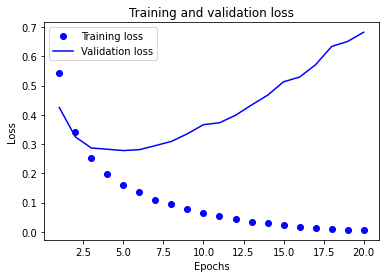

In [11]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

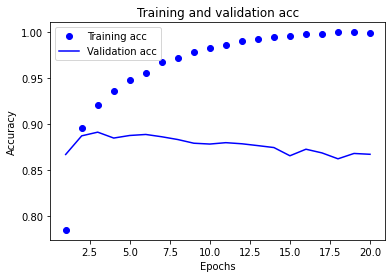

In [12]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

두번째 에포크 이후로 훈련 데이터에 과도하게 최적화되어 훈련 데이터에 특화된 표현을 학습하므로 검증 손실이 증가하고 검증 정확도가 감소

# **모델 다시 훈련**

위에서 이어서 fit() 메서드를 재호출하면 학습된 가중치에서 훈련이 이어지므로 처움부터 다시 학습하려면 모델 객체를 새로 만들어야 함

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.4749 - acc: 0.8085
Epoch 2/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2733 - acc: 0.9078
Epoch 3/4
49/49 [==============================] - 1s 23ms/step - loss: 0.2075 - acc: 0.9276
Epoch 4/4
49/49 [==============================] - 1s 23ms/step - loss: 0.1723 - acc: 0.9404


# **모델 테스트**

In [14]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.2930 - acc: 0.8842


[0.2930338382720947, 0.8841599822044373]

88%의 정확도 달성 ^0^